In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruizgara/socofing")





100%|██████████| 838M/838M [00:04<00:00, 202MB/s]

Extracting files...


In [ ]:
# prompt: download this dataset from kaggle hub
# ruizgara/socofing

import kagglehub
!pip install kagglehub

# Download latest version
path = kagglehub.dataset_download("ruizgara/socofing")


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlo

In [ ]:
# prompt: unzip this file /content/drive/MyDrive/Fingerprint/archive (10).zip

!unzip /content/drive/MyDrive/Fingerprint/Finger.zip -d /content/drive/MyDrive/Fingerprint/


Archive:  /content/drive/MyDrive/Fingerprint/Finger.zip
replace /content/drive/MyDrive/Fingerprint/SOCOFing/Altered/Altered-Easy/100__M_Left_index_finger_CR.BMP? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/archive (12).zip -d /content/drive/MyDrive/Fingerprint/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/archive (12).zip -d /content/drive/MyDrive/Fingerprint/'


In [ ]:
# prompt: get all the details about theis dataset /content/drive/MyDrive/Fingerprint/SOCOFing
# about the type of images, the folders and all the details

import os
import pandas as pd

def get_dataset_details(dataset_path):
  """
  Gets details about a dataset, including image types, folders, and file counts.

  Args:
    dataset_path: The path to the dataset directory.

  Returns:
    A pandas DataFrame with dataset details.
  """

  data = []
  for root, dirs, files in os.walk(dataset_path):
    for file in files:
      file_path = os.path.join(root, file)
      file_type = os.path.splitext(file)[1]
      folder_name = os.path.basename(root)

      data.append({
          'File Path': file_path,
          'File Name': file,
          'File Type': file_type,
          'Folder Name': folder_name,
      })

  df = pd.DataFrame(data)
  return df

# Replace with your dataset path
dataset_path = '/content/drive/MyDrive/Fingerprint/SOCOFing'

df_details = get_dataset_details(dataset_path)
print(df_details)

# Get counts of different file types
file_type_counts = df_details['File Type'].value_counts()
print("\nFile Type Counts:\n", file_type_counts)

# Get counts of files in different folders
folder_counts = df_details['Folder Name'].value_counts()
print("\nFolder Counts:\n", folder_counts)


                                               File Path  \
0      /content/drive/MyDrive/Fingerprint/SOCOFing/Al...   
1      /content/drive/MyDrive/Fingerprint/SOCOFing/Al...   
2      /content/drive/MyDrive/Fingerprint/SOCOFing/Al...   
3      /content/drive/MyDrive/Fingerprint/SOCOFing/Al...   
4      /content/drive/MyDrive/Fingerprint/SOCOFing/Al...   
...                                                  ...   
55265  /content/drive/MyDrive/Fingerprint/SOCOFing/Re...   
55266  /content/drive/MyDrive/Fingerprint/SOCOFing/Re...   
55267  /content/drive/MyDrive/Fingerprint/SOCOFing/Re...   
55268  /content/drive/MyDrive/Fingerprint/SOCOFing/Re...   
55269  /content/drive/MyDrive/Fingerprint/SOCOFing/Re...   

                               File Name File Type   Folder Name  
0        100__M_Left_index_finger_CR.BMP      .BMP  Altered-Easy  
1       100__M_Left_index_finger_Obl.BMP      .BMP  Altered-Easy  
2      100__M_Left_index_finger_Zcut.BMP      .BMP  Altered-Easy  
3       100

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Fingerprint/SOCOFing/Real"

In [ ]:
# ✅ Step 4: Load and Preprocess Dataset
IMG_SIZE = 224  # MobileNetV2 requires 224x224 images
BATCH_SIZE = 32

In [ ]:
def load_images(directory, img_size):
    images = []
    labels = []

    # Load all fingerprint images
    for filename in os.listdir(directory):
        if filename.endswith(".BMP"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img = cv2.resize(img, (img_size, img_size))  # Resize to 224x224
            img = img / 255.0  # Normalize
            images.append(img)

            # Extract label from filename (e.g., SubjectID__Gender_Hand_FingerName_finger.BMP)
            label = filename.split("__")[0]  # Subject ID
            labels.append(label)

    return np.array(images), np.array(labels)

In [ ]:
# Load images and labels
images, labels = load_images(DATASET_PATH, IMG_SIZE)

# Reshape images for CNN input (Add a channel dimension)
images = np.expand_dims(images, axis=-1)  # (N, 224, 224, 1)

In [ ]:

# ✅ Step 5: Convert Labels to Numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# ✅ Step 7: Convert to TensorFlow Format
X_train = np.repeat(X_train, 3, axis=-1)  # Convert grayscale to 3 channels (MobileNetV2 needs 3-channel input)
X_test = np.repeat(X_test, 3, axis=-1)

In [ ]:
# ✅ Step 8: Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")

# Freeze the base model layers
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# ✅ Step 9: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling
x = Dense(512, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Regularization
x = Dense(256, activation="relu")(x)
output_layer = Dense(len(set(labels)), activation="softmax")

In [ ]:


# ✅ Step 10: Create Model
model = Model(inputs=base_model.input, outputs=output_layer)

ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Dense name=dense_5, built=False> including invalid value <Dense name=dense_5, built=False> of type <class 'keras.src.layers.core.dense.Dense'>

In [ ]:
# ✅ Step 9: Add Custom Layers (Ensure Connection)
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling
x = Dense(512, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Regularization
x = Dense(256, activation="relu")(x)  # Additional dense layer
output_layer = Dense(len(set(labels)), activation="softmax", name="output_layer")(x)  # Output layer

# ✅ Step 10: Create Model (Now Properly Connected)
model = Model(inputs=base_model.input, outputs=output_layer)

# ✅ Step 11: Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:




# ✅ Step 12: Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=BATCH_SIZE, epochs=10)

# ✅ Step 13: Save Model
model.save("/content/drive/MyDrive/Fingerprint/fingerprint_model.h5")

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 124ms/step - accuracy: 0.0015 - loss: 6.4853 - val_accuracy: 0.0025 - val_loss: 6.3107
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0076 - loss: 6.2270 - val_accuracy: 0.0167 - val_loss: 5.9094
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0193 - loss: 5.7206 - val_accuracy: 0.0292 - val_loss: 5.4575
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0418 - loss: 5.1724 - val_accuracy: 0.0375 - val_loss: 5.2119
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0669 - loss: 4.7978 - val_accuracy: 0.0667 - val_loss: 4.9949
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0934 - loss: 4.4751 - val_accuracy: 0.0867 - val_loss: 4.8501
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1193 - loss: 4.1721 - val_accuracy: 0.0850 - val_loss: 4.7558
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1364 - loss: 3.9175 - val_ac

In [ ]:

# ✅ Step 14: Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1141 - loss: 4.6837
Test Accuracy: 11.50%


In [ ]:
def match_fingerprint(image_path, model, label_encoder):
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224)) / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.repeat(img, 3, axis=-1)  # Convert to 3 channels
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get prediction
    pred = model.predict(img)
    predicted_label = np.argmax(pred, axis=1)

    # Convert numeric label back to SubjectID
    subject_id = label_encoder.inverse_transform(predicted_label)[0]
    return subject_id

# Example usage:
image_path = "/content/finger1.BMP"
subject_id = match_fingerprint(image_path, model, label_encoder)
print(f"Matched Subject ID: {subject_id}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Matched Subject ID: 477


In [ ]:
# ✅ Step 1: Install & Import Dependencies
!pip install -q tensorflow keras efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Fingerprint/SOCOFing"

In [ ]:
# ✅ Step 3: Define Image Size & Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25  # Increase if needed

In [ ]:
# ✅ Step 4: Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)


Found 44216 images belonging to 2 classes.
Found 11054 images belonging to 2 classes.


In [ ]:
# ✅ Step 5: Load EfficientNetB0 (Pretrained Model)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# ✅ Step 6: Freeze Base Model (Transfer Learning)
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# ✅ Step 7: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce dimensions
x = Dense(512, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Prevent overfitting
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(train_generator.class_indices), activation="softmax")(x)


In [ ]:

# ✅ Step 8: Create Model
model = Model(inputs=base_model.input, outputs=output_layer)

In [ ]:

# ✅ Step 9: Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Fine-tuned LR
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# ✅ Step 10: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 880s 617ms/step - accuracy: 0.8903 - loss: 0.3539 - val_accuracy: 0.8914 - val_loss: 0.3420
Epoch 2/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 672s 486ms/step - accuracy: 0.8926 - loss: 0.3426 - val_accuracy: 0.8914 - val_loss: 0.3437
Epoch 3/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 672s 487ms/step - accuracy: 0.8934 - loss: 0.3374 - val_accuracy: 0.8914 - val_loss: 0.3441
Epoch 4/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 668s 483ms/step - accuracy: 0.8931 - loss: 0.3372 - val_accuracy: 0.8914 - val_loss: 0.3398
Epoch 5/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 654s 473ms/step - accuracy: 0.8929 - loss: 0.3357 - val_accuracy: 0.8914 - val_loss: 0.3408
Epoch 6/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 655s 474ms/step - accuracy: 0.8942 - loss: 0.3305 - val_accuracy: 0.8914 - val_loss: 0.3408
Epoch 7/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 652s 472ms/step - accuracy: 0.8891 - loss: 0.3429 - val_accuracy: 0.8914 - val_loss: 0.3437
Epoch 8/25
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 653s 472ms/step - ac

In [ ]:
# ✅ Step 11: Unfreeze Base Model & Fine-tune (Optional)
base_model.trainable = True  # Unfreeze for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# ✅ Step 12: Continue Training with Fine-Tuning
fine_tune_epochs = 10
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs,
    verbose=1
)

Epoch 1/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 788s 512ms/step - accuracy: 0.9472 - loss: 0.1339 - val_accuracy: 0.1621 - val_loss: 1.7932
Epoch 2/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 655s 474ms/step - accuracy: 0.9933 - loss: 0.0194 - val_accuracy: 0.3060 - val_loss: 1.9274
Epoch 3/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 656s 475ms/step - accuracy: 0.9949 - loss: 0.0142 - val_accuracy: 0.1511 - val_loss: 2.0161
Epoch 4/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 655s 474ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.1513 - val_loss: 4.7949
Epoch 5/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 655s 474ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 0.4093 - val_loss: 2.2484
Epoch 6/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 657s 475ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.1122 - val_loss: 4.4317
Epoch 7/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 660s 478ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.8844 - val_loss: 0.9561
Epoch 8/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 659s 477ms/step - ac

In [ ]:
# ✅ Step 13: Save Model
model.save("/content/drive/MyDrive/Fingerprint/fingerprint_model2.h5")

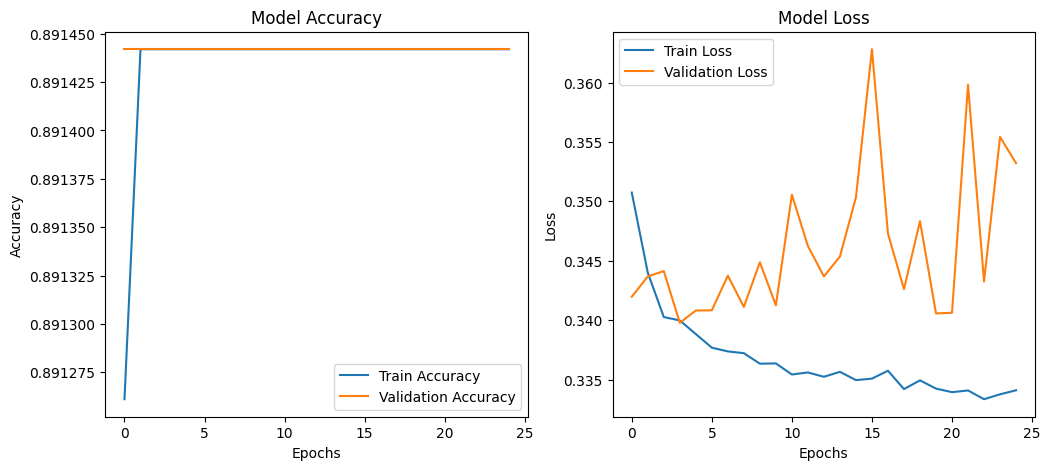

In [ ]:
# ✅ Step 13: Plot Accuracy & Loss Graphs
def plot_training(history):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Model Accuracy")

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Model Loss")

    plt.show()

plot_training(history)


In [ ]:
# ✅ Step 14: Evaluate Model on Validation Data
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n🔹 Final Validation Accuracy: {val_acc*100:.2f}%")

346/346 ━━━━━━━━━━━━━━━━━━━━ 133s 383ms/step - accuracy: 0.8780 - loss: 0.4963

🔹 Final Validation Accuracy: 87.65%


346/346 ━━━━━━━━━━━━━━━━━━━━ 143s 395ms/step


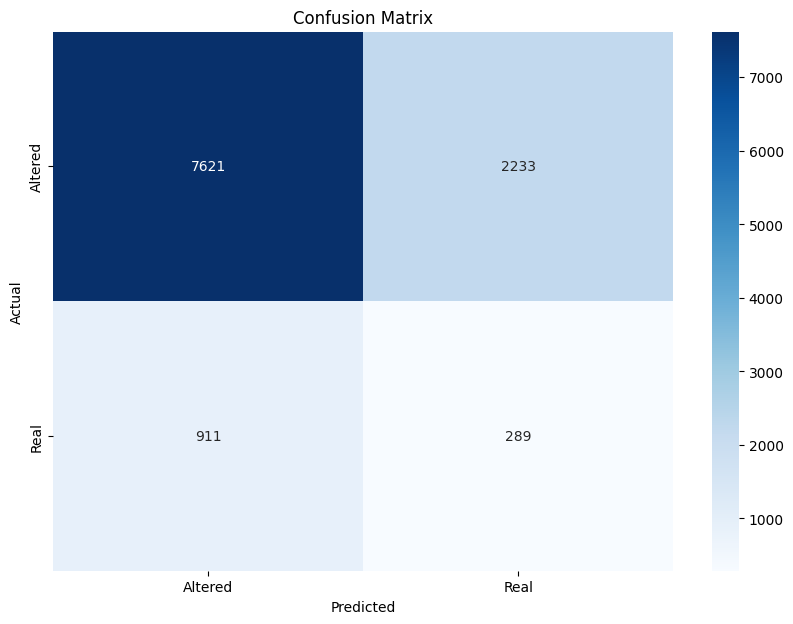


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      9854
           1       0.11      0.24      0.16      1200

    accuracy                           0.72     11054
   macro avg       0.50      0.51      0.49     11054
weighted avg       0.81      0.72      0.76     11054



In [ ]:
# ✅ Step 15: Confusion Matrix & Classification Report
def plot_confusion_matrix(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=generator.class_indices, yticklabels=generator.class_indices)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:\n", classification_report(y_true, y_pred))

plot_confusion_matrix(model, val_generator)

In [ ]:
def match_fingerprint(image_path, model, label_encoder):
    # Load and preprocess image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224)) / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.repeat(img, 3, axis=-1)  # Convert to 3 channels
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get prediction
    pred = model.predict(img)
    predicted_label = np.argmax(pred, axis=1)

    # Convert numeric label back to SubjectID
    subject_id = label_encoder.inverse_transform(predicted_label)[0]
    return subject_id

# Example usage:
image_path = "/content/finger1.BMP"
subject_id = match_fingerprint(image_path, model, label_encoder)
print(f"Matched Subject ID: {subject_id}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Matched Subject ID: 1


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def visualize_match(image_path, matched_subject_id, dataset_path):
    # Load and preprocess query image
    query_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find the matched image in the dataset
    matched_image_path = None
    for file in os.listdir(dataset_path):
        if file.startswith(matched_subject_id):  # Match subject ID with dataset
            matched_image_path = os.path.join(dataset_path, file)
            break

    if matched_image_path:
        matched_img = cv2.imread(matched_image_path, cv2.IMREAD_GRAYSCALE)
    else:
        print("Matched image not found in dataset.")
        return

    # Plot images side by side
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(query_img, cmap='gray')
    plt.title("Query Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(matched_img, cmap='gray')
    plt.title(f"Matched Image: {matched_subject_id}")
    plt.axis("off")

    plt.show()

 # Change to your dataset folder
visualize_match(image_path, subject_id, dataset_path)


Matched image not found in dataset.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


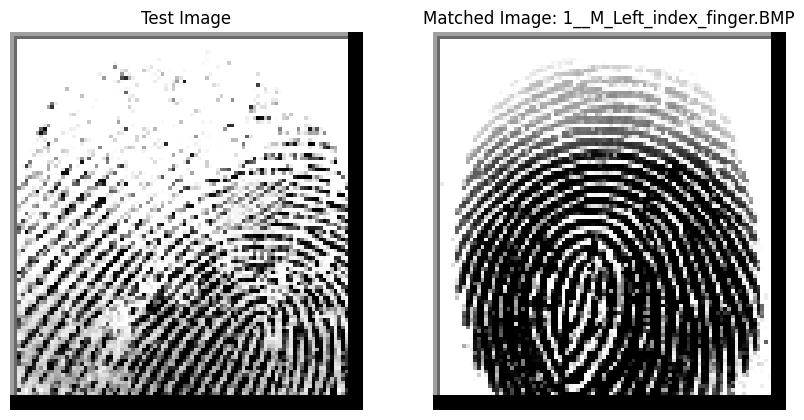

✅ Matched Subject ID: 1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def match_fingerprint(image_path, model, label_encoder, database_path):
    # Load and preprocess test image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Test image not found at {image_path}")

    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
    img_resized = np.repeat(img_resized, 3, axis=-1)  # Convert to 3 channels
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    # Get prediction
    pred = model.predict(img_resized)
    predicted_label = np.argmax(pred, axis=1)

    # Convert numeric label back to SubjectID
    subject_id = label_encoder.inverse_transform(predicted_label)[0]

    # Find the matched fingerprint in the database
    matched_filename = None
    for filename in os.listdir(database_path):
        if filename.startswith(f"{subject_id}__"):  # Match subject ID pattern
            matched_filename = filename
            break

    if not matched_filename:
        print(f"❌ No Match Found for Subject ID: {subject_id}")
        return None

    matched_image_path = os.path.join(database_path, matched_filename)

    # Load matched fingerprint image
    matched_img = cv2.imread(matched_image_path, cv2.IMREAD_GRAYSCALE)
    if matched_img is None:
        raise ValueError(f"Error: Unable to load matched image at {matched_image_path}")

    # Visualize Test and Matched Images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Test Image")
    axes[0].axis("off")

    axes[1].imshow(matched_img, cmap="gray")
    axes[1].set_title(f"Matched Image: {matched_filename}")
    axes[1].axis("off")

    plt.show()

    return subject_id

# Example usage
image_path = "/content/finger1.BMP"  # Update with your test fingerprint path
database_path = "/content/drive/MyDrive/Fingerprint/SOCOFing/Real"
subject_id = match_fingerprint(image_path, model, label_encoder, database_path)

if subject_id:
    print(f"✅ Matched Subject ID: {subject_id}")
